In [ ]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table

project = 'mentorship-tolga-fernando-ds' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=mentorship-tolga-fernando-ds:US:bquxjob_77abf7b7_18c07184042)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_77abf7b7_18c07184042') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `mentorship-tolga-fernando-ds.Global_Development_Indexes.indexes_combined_development_and_happiness` LIMIT 1000


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

EXPLORATORY ANALYSIS

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_77abf7b7_18c07184042') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,Country,HDI,LifeExpectancy,ExpectedSchooling,MeanSchooling,GNIPerCapita,GNIRankMinusHDIRank,Median_Happiness_Index_10Years
0,Guinea-Bissau,483.0,59.7,10.6,3.6,1.91,0.0,NaN
1,Bolivia (Plurinational State of),692.0,63.6,14.9,9.8,8.11,0.0,NaN
2,Italy,895.0,82.9,16.2,10.7,42.84,0.0,6.12
3,Dominica,720.0,72.8,13.3,8.1,11.49,0.0,NaN
4,Mozambique,446.0,59.3,10.2,3.2,1.20,2.0,4.79
...,...,...,...,...,...,...,...,...
186,Cuba,764.0,73.7,14.4,12.5,7.88,37.0,NaN
187,Qatar,855.0,79.3,12.6,10.0,87.13,-39.0,6.38
188,Botswana,693.0,61.1,12.3,10.3,16.20,-43.0,3.54
189,Guyana,714.0,65.7,12.5,8.6,22.47,-47.0,NaN


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
results.describe()

,HDI,LifeExpectancy,ExpectedSchooling,MeanSchooling,GNIPerCapita,GNIRankMinusHDIRank,Median_Happiness_Index_10Years
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,141.000000
mean,720.575916,71.314660,13.530366,8.983770,33.147487,0.188482,5.457447
std,150.660627,7.646519,2.926039,3.173193,103.052397,14.060249,1.112097
min,385.000000,52.500000,5.500000,2.100000,1.080000,-47.000000,3.250000
25%,599.500000,65.750000,11.600000,6.250000,4.800000,-8.000000,4.530000
50%,739.000000,71.700000,13.400000,9.300000,12.670000,2.000000,5.440000
75%,835.000000,76.700000,15.600000,11.500000,30.860000,9.000000,6.240000
max,962.000000,85.500000,21.100000,14.100000,966.000000,37.000000,7.700000


## CORRELATIONS

<ipython-input-5-422a94ea0d65>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = results.corr(method='pearson')


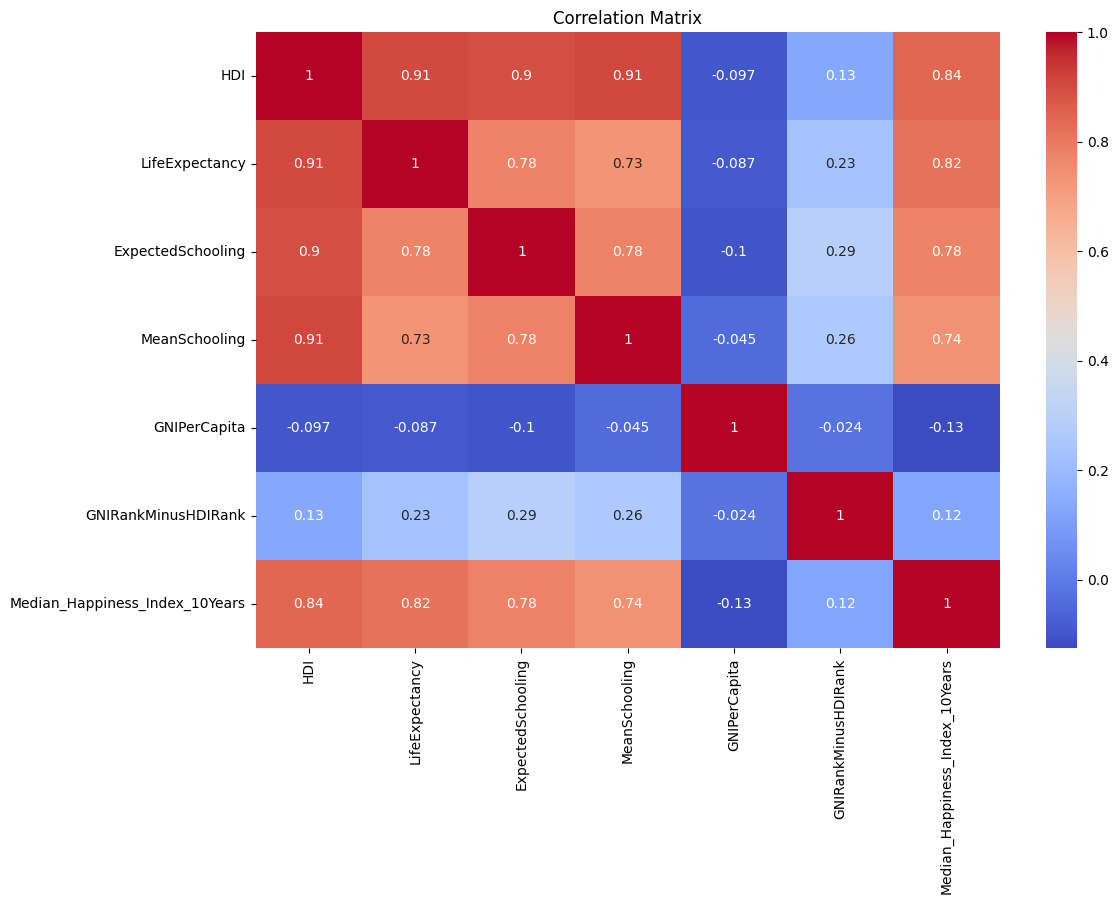

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame
# Convert the relevant columns to numeric, as they are currently stored as strings
columns_to_convert = ['HDI', 'LifeExpectancy', 'ExpectedSchooling', 'MeanSchooling',
                      'GNIPerCapita', 'GNIRankMinusHDIRank', 'Median_Happiness_Index_10Years']

for column in columns_to_convert:
    results[column] = pd.to_numeric(results[column], errors='coerce')

# Calculate the correlation matrix
# Change to 'spearman' if your data is not normally distributed
correlation_matrix = results.corr(method='pearson')

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The Human Development Index (HDI) exhibits very strong positive correlations with Life Expectancy (r = 0.91), Expected Schooling (r = 0.90), and Mean Schooling (r = 0.91), which underscores the close relationship between higher HDI and improvements in both health and education sectors. Additionally, there is a robust positive correlation between HDI and the Median Happiness Index over 10 Years (r = 0.84), suggesting that as human development improves, so does the perceived well-being of the population.

Life Expectancy also shows a strong positive correlation with the Median Happiness Index over 10 Years (r = 0.82), reinforcing the link between longer lifespans and higher levels of happiness. Expected Schooling and the Median Happiness Index show a slightly weaker yet significant positive correlation (r = 0.78), indicating that increased educational opportunities might be associated with increased happiness.

Interestingly, the correlations between GNIPerCapita and other indicators such as HDI, Life Expectancy, and Expected Schooling are slightly negative (r = -0.097, -0.087, and -0.10 respectively), which could suggest that beyond a certain point, increased income per capita does not necessarily lead to proportional improvements in these aspects of human development.

The GNI Rank Minus HDI Rank shows very weak to negligible correlations with other indicators, which may imply that the difference in ranking between GNI and HDI does not have a straightforward relationship with the development factors considered in this dataset.

These correlations offer a data-driven foundation for understanding the complex interdependencies between economic, educational, and health-related factors in human development and happiness. They can serve as a basis for further investigation into the causal relationships and policy implications.






##CLUSTERS

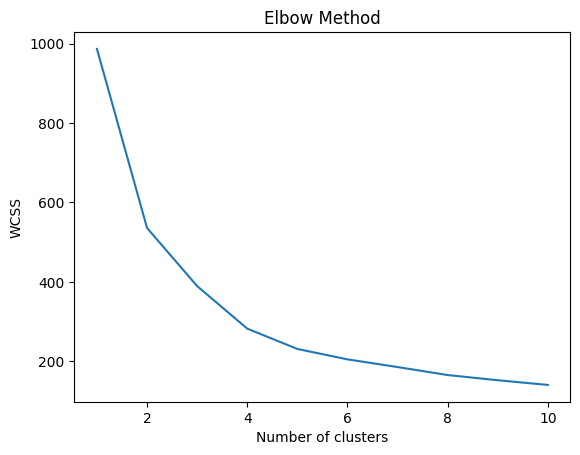

<ipython-input-7-68ef8c0666b7>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster'] = cluster_labels


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame and already contains the relevant columns.

# Remove rows with any null values
cleaned_data = results.dropna(subset=['HDI', 'LifeExpectancy', 'ExpectedSchooling',
                                      'MeanSchooling', 'GNIPerCapita',
                                      'GNIRankMinusHDIRank', 'Median_Happiness_Index_10Years'])

# Normalize the numeric columns
scaler = StandardScaler()
numeric_columns = ['HDI', 'LifeExpectancy', 'ExpectedSchooling', 'MeanSchooling',
                   'GNIPerCapita', 'GNIRankMinusHDIRank', 'Median_Happiness_Index_10Years']
data_normalized = scaler.fit_transform(cleaned_data[numeric_columns])

# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters based on the elbow graph and run K-Means
optimal_clusters = 3  # Replace with the actual optimal number from the elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_normalized)

# Assign cluster labels to the original data
cleaned_data['Cluster'] = cluster_labels


In [ ]:
# Assuming the optimal number of clusters from the elbow plot is 3
optimal_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model and predict the cluster labels
cluster_labels = kmeans.fit_predict(data_normalized)

# Assign the cluster labels back to the original cleaned data
cleaned_data['Cluster'] = cluster_labels

# analyze the results
#print out the mean values for each cluster
for i in range(optimal_clusters):
    cluster_data = cleaned_data[cleaned_data['Cluster'] == i]
    print(f"Cluster {i} mean values:")
    print(cluster_data[numeric_columns].mean())
    print("\n")


Cluster 0 mean values:
HDI                               832.758621
LifeExpectancy                     76.664368
ExpectedSchooling                  15.505747
MeanSchooling                      11.163218
GNIPerCapita                       31.448276
GNIRankMinusHDIRank                 3.091954
Median_Happiness_Index_10Years      6.083448
dtype: float64


Cluster 1 mean values:
HDI                               565.784314
LifeExpectancy                     63.876471
ExpectedSchooling                  10.992157
MeanSchooling                       5.668627
GNIPerCapita                        5.003922
GNIRankMinusHDIRank                -5.392157
Median_Happiness_Index_10Years      4.505882
dtype: float64


Cluster 2 mean values:
HDI                               405.000000
LifeExpectancy                     56.866667
ExpectedSchooling                   8.066667
MeanSchooling                       4.366667
GNIPerCapita                      822.000000
GNIRankMinusHDIRank                 1.3333

<ipython-input-9-a82e8a0176b8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster'] = cluster_labels


**Cluster 0 **represents a group of countries with relatively high human development. The average Human Development Index (HDI) is quite high at 832.76, paired with a life expectancy of approximately 76.7 years and high levels of education, both expected and mean schooling at around 15.5 and 11.2 years, respectively. The GNI Per Capita is moderate at 31.44, suggesting a reasonable income level. The positive GNIRankMinusHDIRank indicates that these countries are ranked higher in terms of income than in human development. The Median Happiness Index over 10 years is also quite high at 6.08, which suggests that the populations in these countries generally perceive themselves as relatively happy. This cluster may represent developed or upper-middle-income countries where both economic and social indicators are strong.

**Cluster 1 **includes countries with moderate human development. The average HDI score is lower at 565.78 compared to Cluster 0, and life expectancy is shorter at approximately 63.9 years. Educational attainment is also lower, with expected schooling at nearly 11 years and mean schooling at about 5.7 years. The GNI Per Capita is low at 5.00, and the negative GNIRankMinusHDIRank suggests that these countries have a lower income rank compared to their human development rank. The Median Happiness Index is moderate at 4.51. This cluster likely represents developing or lower-middle-income countries where there is a significant room for improvement in both economic and educational sectors.

**Cluster 2** seems to represent countries with lower human development metrics. The average HDI is the lowest among the clusters at 405, and life expectancy is around 56.9 years, which is considerably lower than the other clusters. Educational levels are also low, with expected schooling at just over 8 years and mean schooling at 4.4 years. Interestingly, the GNI Per Capita is an outlier at 822, which is disproportionately high compared to the other indicators. This might suggest that these countries have high income from certain resources or industries, but this wealth is not evenly distributed or does not translate effectively into human development gains. The GNIRankMinusHDIRank is slightly positive, and the Median Happiness Index is quite low at 3.48, indicating lower perceived well-being. This cluster may represent countries where despite potentially significant natural resources or wealth, there are considerable challenges to social development and general well-being.

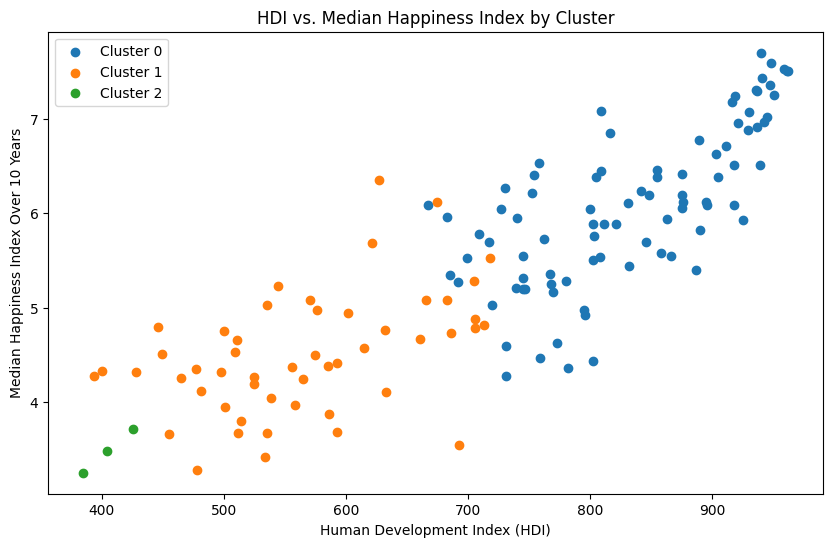

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your DataFrame with the 'Cluster' column included
# and 'Median_Happiness_Index_10Years' is the column name for the happiness index median.

# Scatter plot of HDI vs. Median Happiness Index, colored by cluster
plt.figure(figsize=(10, 6))
for cluster in cleaned_data['Cluster'].unique():
    cluster_data = cleaned_data[cleaned_data['Cluster'] == cluster]
    plt.scatter(cluster_data['HDI'],
                cluster_data['Median_Happiness_Index_10Years'],
                label=f'Cluster {cluster}')

plt.title('HDI vs. Median Happiness Index by Cluster')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Median Happiness Index Over 10 Years')
plt.legend()
plt.show()


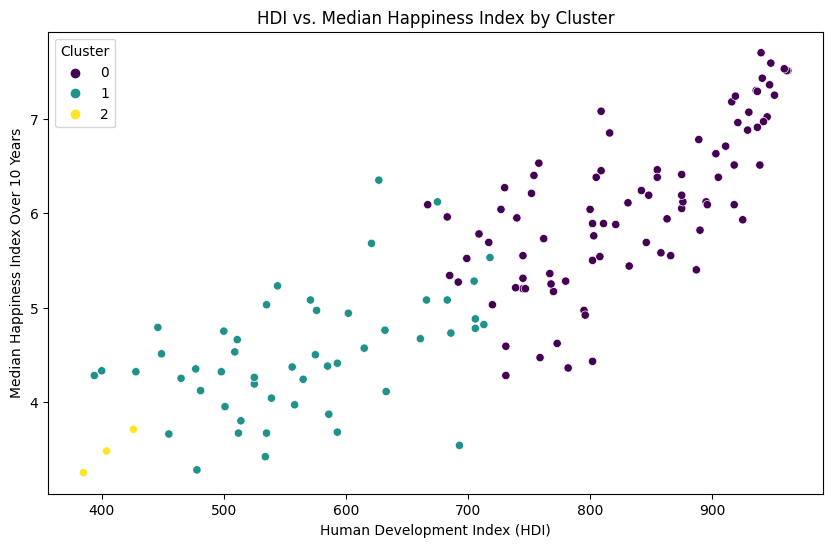

In [ ]:
import seaborn as sns

# Scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data,
                x='HDI',
                y='Median_Happiness_Index_10Years',
                hue='Cluster',
                palette='viridis')

plt.title('HDI vs. Median Happiness Index by Cluster')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Median Happiness Index Over 10 Years')
plt.legend(title='Cluster')
plt.show()
